In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
from progressbar import ProgressBar
import re
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
books=pd.read_csv('/content/drive/My Drive/Books Recommendation/books.csv')
books.shape

(10000, 23)

In [5]:
books.dtypes

id                             int64
book_id                        int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
dtype: object

In [7]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [9]:
books.count().sort_values

<bound method Series.sort_values of id                           10000
book_id                      10000
best_book_id                 10000
work_id                      10000
books_count                  10000
isbn                          9300
isbn13                        9415
authors                      10000
original_publication_year     9979
original_title                9415
title                        10000
language_code                 8916
average_rating               10000
ratings_count                10000
work_ratings_count           10000
work_text_reviews_count      10000
ratings_1                    10000
ratings_2                    10000
ratings_3                    10000
ratings_4                    10000
ratings_5                    10000
image_url                    10000
small_image_url              10000
dtype: int64>

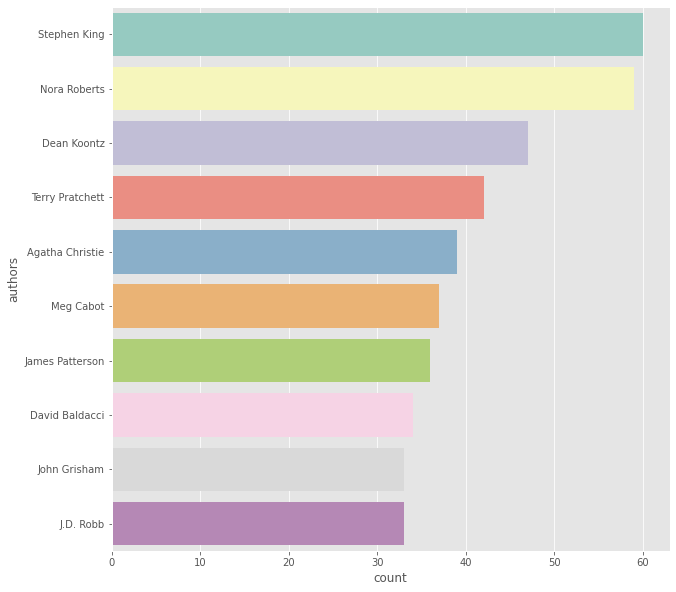

In [10]:
plt.figure(figsize=(10,10))
plot = sns.countplot(y = "authors", data = books, order = books['authors'].value_counts().iloc[:10].index, palette = "Set3")

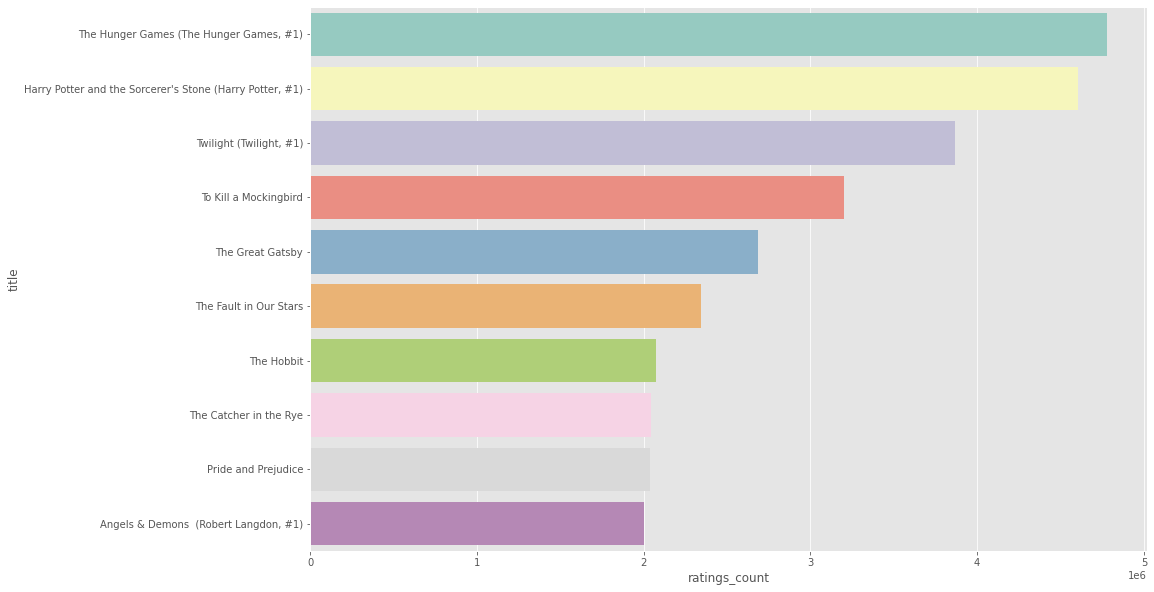

In [11]:
most_rated = books.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='Set3')

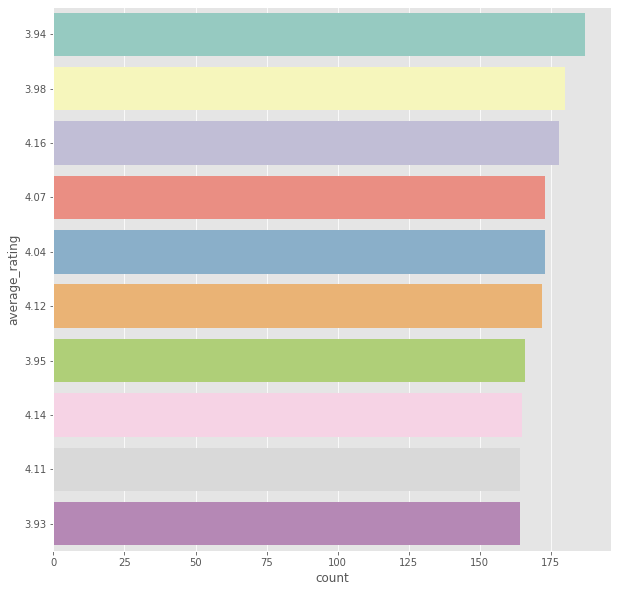

In [12]:
plt.figure(figsize=(10,10))
plot = sns.countplot(y = "average_rating", data = books, order = books['average_rating'].value_counts().iloc[:10].index, palette = "Set3")

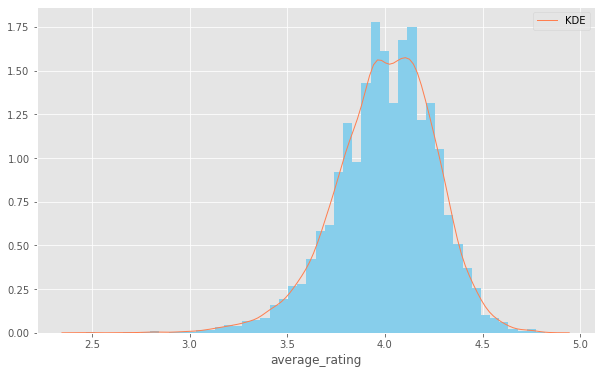

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(books['average_rating'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 1, "alpha": 1, "color": "skyblue"});

<Figure size 1080x720 with 0 Axes>

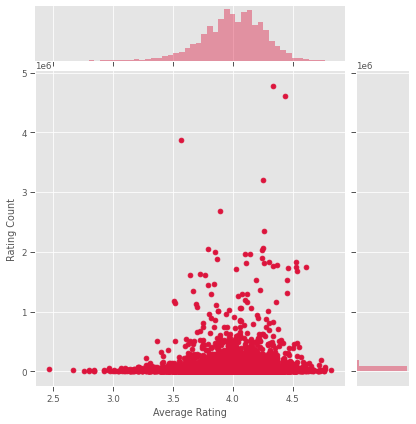

In [19]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="ratings_count", data = books, color = 'crimson')
ax.set_axis_labels("Average Rating", "Rating Count")

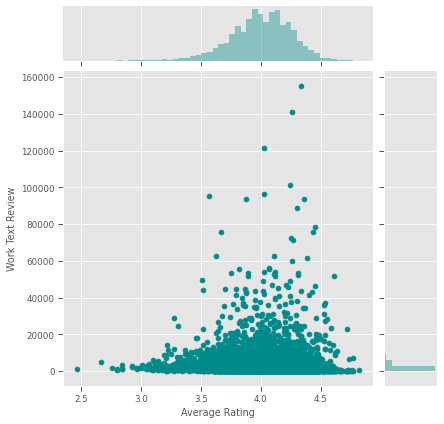

In [23]:
ax = sns.jointplot(x="average_rating", y="work_text_reviews_count", data = books, color = 'darkcyan')
ax.set_axis_labels("Average Rating", "Work Text Review")

In [24]:
ratings=pd.read_csv('/content/drive/My Drive/Books Recommendation/ratings.csv')
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


<Figure size 1080x720 with 0 Axes>

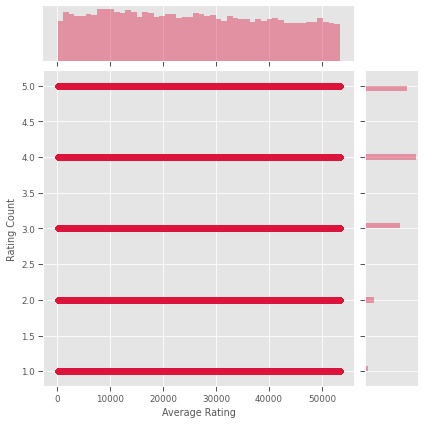

In [27]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="user_id", y="rating", data = ratings, color = 'crimson')
ax.set_axis_labels("Average Rating", "Rating Count")